# EECS 16A Fall 2023 Homework 12

In [1]:
from __future__ import division
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


## Question 2: Mechanical Correlation

### Part (b)

In [ ]:
s1 = [2, -2, 2, -2]
s2 = [1, 2, 3, 4]

def plot_signal(sig):
    plt.figure(figsize = (20, 10))
    plt.stem(np.arange(-(len(sig)-1)/2, (len(sig)-1)/2+1), sig)
    plt.show()

# Use the function np.correlate with mode='full' for linear cross correlation.
# The provided plot_signal function can help you visualize your results.
## Your code here

sig1 = np.correlate(s1, s2, mode='full')
sig2 = np.correlate(s2, s1, mode='full')

plot_signal(sig1)
plot_signal(sig2)

##  Mechanical Least Squares - Optional IPython code for plotting

In [2]:
# use for plotting
a = np.array([2,4,6,8])
b = np.array([2,6,7,8])

### Part (a)

In [3]:
# find a linear model of the form:   b = xa
# According to the least squares formula, we can calculate x
# xhat =(a.T*a)^(-1)*a.T*b
xhat = (1/np.dot(a,a))*np.dot(a,b)
print('xhat: '+str(xhat))
bhat = a*xhat

# Calculate squared error
se = np.dot(b-bhat,b-bhat)
print('the squared error is '+str(se))

xhat: 1.1166666666666667
the squared error is 3.3666666666666667


Notice that the fit is okay but could be made better if we added a b-intercept.


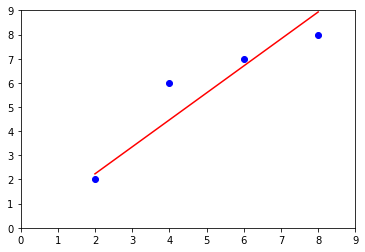

In [4]:
#HERE IS HOW TO PLOT POINTS
plt.plot(a,b,'ob') 
#HERE IS HOW TO PLOT A LINE
plt.plot(a,bhat,'-r')
#HERE IS HOW TO CHANGE THE LIMITS OF THE PLOTTING WINDOW
plt.xlim([0,9]); plt.ylim([0,9]);

print('Notice that the fit is okay but could be made better if we added a b-intercept.')

### Part (b)

In [5]:
# The augmented A matrix is given by
a2 = a.copy()
b2 = b.copy()
A2 = np.vstack([a2,np.ones(len(a2))]).T
print('The augmented A matrix is')
print(A2)
# by the least squares formula we can calculate xhat
xhat2 = np.dot(np.linalg.inv(np.dot(A2.T,A2)),np.dot(A2.T,b2))
print('xhat:')
print(xhat2)
# The squared error is given by
bhat2 = np.dot(A2,xhat2)
se2 = np.dot(b2 - bhat2,b2-bhat2)
print('the squared error is '+str(se2))

The augmented A matrix is
[[2. 1.]
 [4. 1.]
 [6. 1.]
 [8. 1.]]
xhat:
[0.95 1.  ]
the squared error is 2.7


By adding a b-intercept we have definitely improved the fit.
This can be seen in the graph as well as the value of the squared error


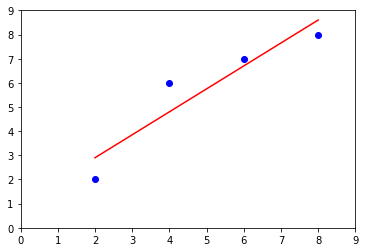

In [6]:
#HERE IS HOW TO PLOT POINTS
plt.plot(a2,b2,'ob') 
#HERE IS HOW TO PLOT A LINE
plt.plot(a2,bhat2,'-r')
#HERE IS HOW TO CHANGE THE LIMITS OF THE PLOTTING WINDOW
plt.xlim([0,9]); plt.ylim([0,9]);
print('By adding a b-intercept we have definitely improved the fit.')
print('This can be seen in the graph as well as the value of the squared error')

##  GPS Receivers

In [7]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [8]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

### Part (a)

<ipython-input-9-74157bf91bf5>:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ind_10,self_10)


<StemContainer object of 3 artists>

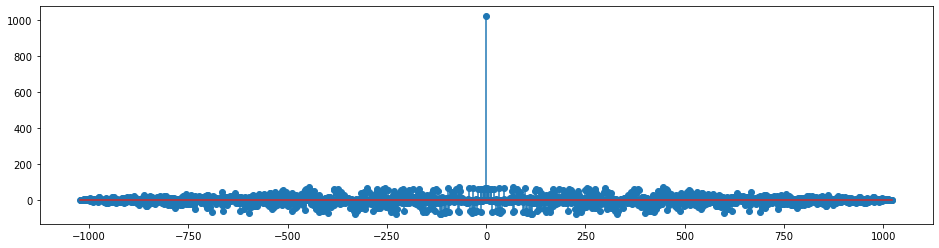

In [9]:
## PART A CODE HERE
def array_correlation(array1,array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value. array1 and array2 do not have to be
    arrays of equal length.
    """
    ## INSERT YOUR CODE HERE
    ## Use np.correlate with "FULL". Check out the helper page for it 
    correlated_array = np.correlate(array1,array2,'full')
    length1 = len(array1)
    length2 = len(array2)
    min_ind = min(length1,length2)
    max_ind = max(length1,length2)
    indices = np.linspace(-min_ind + 1, max_ind - 1, min_ind + max_ind -1)
    return (indices, correlated_array)

# Plot the auto-correlation of satellite 10 with itself. Your signal should be centered
# at offset = 0.
# Use plt.plot or plt.stem to plot.
array_10 = Gold_code_satellite(10)
(ind_10, self_10) = array_correlation(array_10,array_10)
plt.figure(figsize=(16,4))
plt.stem(ind_10,self_10)

### Part (b)

<ipython-input-10-f3a632d96225>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ind_10_13,cross_10_13)


<StemContainer object of 3 artists>

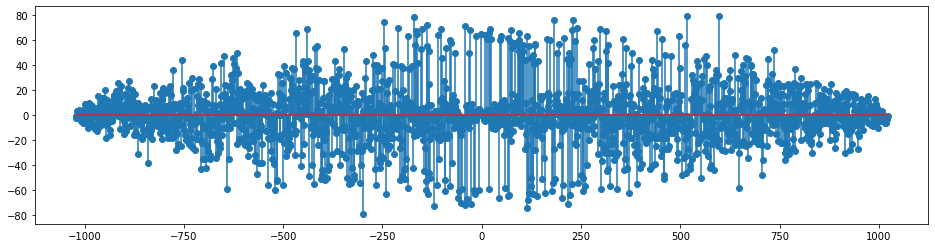

In [10]:
## PART B CODE HERE
array_13 = Gold_code_satellite(13)
(ind_10_13, cross_10_13) = array_correlation(array_10,array_13)
plt.figure(figsize=(16,4))
plt.stem(ind_10_13,cross_10_13)

### Part (c)

<ipython-input-11-4e5ec6d1601e>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ind_intrand,cross_intrand)


<StemContainer object of 3 artists>

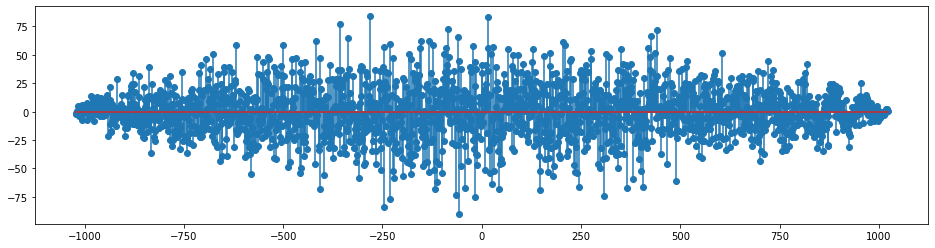

In [11]:
## PART C CODE HERE
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2,size = length_of_noise)
    noise_array = 2*noise_array - np.ones(size(noise_array))
    return noise_array

intrand_signal = integernoise_generator(1023)
(ind_intrand,cross_intrand) =array_correlation(intrand_signal, array_10)
plt.figure(figsize=(16,4))
plt.stem(ind_intrand,cross_intrand)

### Part (d)

<ipython-input-12-9c50c15cfa2f>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ind_gaussrand,cross_gaussrand)


<StemContainer object of 3 artists>

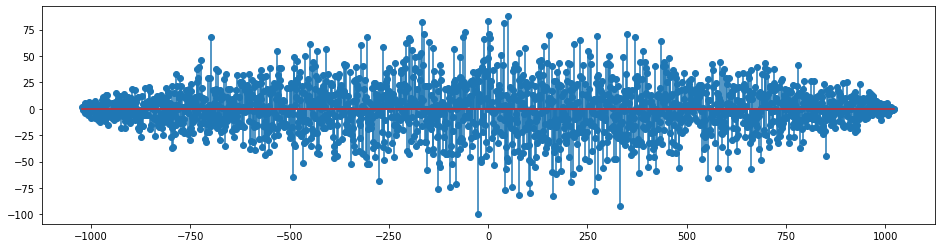

In [12]:
## PART D CODE HERE
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0,1,length_of_noise)
    return noise_array

gaussrand_signal = gaussiannoise_generator(1023)
(ind_gaussrand,cross_gaussrand) =array_correlation(gaussrand_signal,array_10)
plt.figure(figsize=(16,4))
plt.stem(ind_gaussrand,cross_gaussrand)

### Part (e)
Hint: You can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. 

Hint: np.argwhere may be useful for detecting satellites with peaks. You can use other functions too.

In [43]:
## PART E CODE HERE
## USE 'np.load' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY
## This function returns a 1 if peak (greater than threshold or less than -threshold) is found else it returns a 0.
def find_peak(correlation,threshold):
    max_value = np.amax(correlation)
    min_value = np.amin(correlation)
    if max_value > threshold:
        ret_value = 1
    elif min_value < -1*threshold:
        ret_value = 1
    else:
        ret_value = 0
    return ret_value
    
signal1 = np.load('data1.npy')
visible_sat_e = np.zeros(24)
thresh = 800


for sat_ID in np.arange(1,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(signal1, gold_code)
    visible_sat_e[sat_ID-1] = find_peak(correlation,thresh)
    if find_peak(correlation, thresh):
        visible_sat_e[sat_ID - 1] = 1
        print('Visible:',sat_ID)

print(visible_sat_e) # positions of 1's indicate the number of the satellite present.
print('Visible:', np.argwhere(visible_sat_e)[:,0]+1)
## The satellites that are present are 4, 7, 13, 19

Visible: 4
Visible: 7
Visible: 13
Visible: 19
[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Visible: [ 4  7 13 19]


### Part (f)
Hint: You can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. 

Hint: np.argwhere may be useful for detecting satellites with peaks. You can use other functions too.

Visible: [3]


<ipython-input-14-fc41739ed219>:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(sat3_data)


Timestamps for 1s [[ 253.]
 [4345.]]
Timestamps for -1s [[1276.]
 [2299.]
 [3322.]]


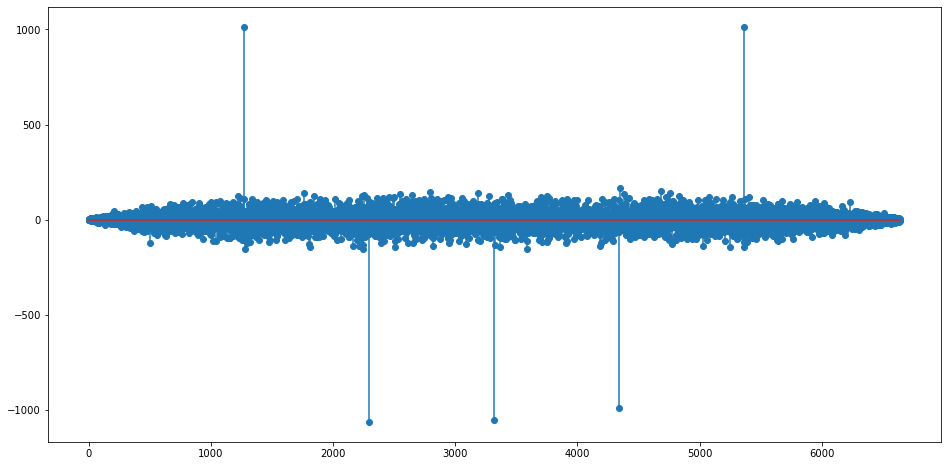

In [14]:
## PART F CODE HERE
## USE DATA2.NPY AS THE SIGNAL ARRAY
signal2 = np.load('data2.npy')
visible_sat_f = np.zeros(24)
thresh = 800
for sat_ID in np.arange(1,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(signal2,gold_code)
    visible_sat_f[sat_ID-1] = find_peak(correlation,thresh)

print('Visible:',np.argwhere(visible_sat_f)[:,0]+1)

## Satellite visible is satellite 3. Let's now proceed to find the data
array_3 = Gold_code_satellite(3)
(ind_3,sat3_data) = array_correlation(signal2,array_3)
plt.figure(figsize=(16,8))
plt.stem(sat3_data)
## This tells us visually that the data is 1, -1, -1, -1, 1


## Another way to do this (optional) is as follows

## Find all 1s:
print('Timestamps for 1s',ind_3[np.argwhere(sat3_data > thresh)])

## Find all -1s:
print('Timestamps for -1s',ind_3[np.argwhere(sat3_data < -1 * thresh)])

## This again tells us that the data is 1, -1, -1, -1, 1

### Part (g)
Hint: You can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. 

Hint: np.argwhere may be useful for detecting satellites with peaks. You can use other functions too.

Visible: [ 5 20]


<ipython-input-15-95b00f67a361>:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ind_5,sat5_data)
<ipython-input-15-95b00f67a361>:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ind_20,sat20_data)


Delay for Satellite 5: 253.0
Delay for Satellite 20: 506.0


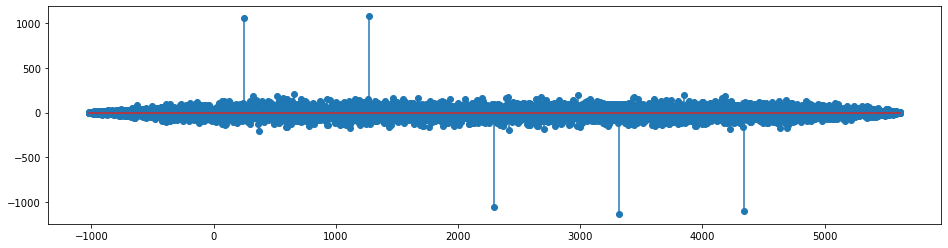

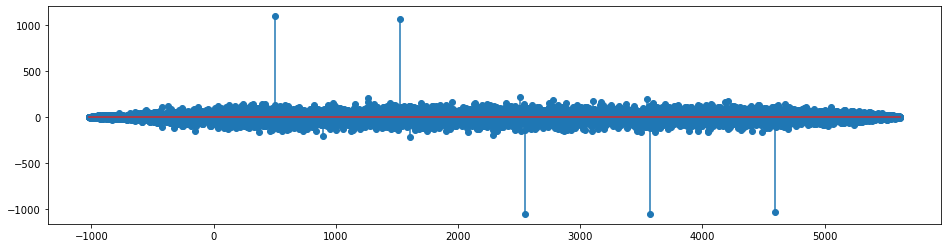

In [15]:
## PART G CODE HERE (OPTIONAL)
## USE DATA3.NPY AS THE SIGNAL ARRAY
signal3 = np.load('data3.npy')
visible_sat_g = np.zeros(24)
thresh = 800
for sat_ID in np.arange(1,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(gold_code,signal3)
    visible_sat_g[sat_ID-1] = find_peak(correlation,thresh)

print('Visible:',np.argwhere(visible_sat_g)[:,0]+1)
## This tells us that the satellites present in this data are 5 and 20. 


array_5 = Gold_code_satellite(5)
array_20 = Gold_code_satellite(20)
(ind_5,sat5_data) = array_correlation(signal3,array_5)
(ind_20,sat20_data) = array_correlation(signal3,array_20)

plt.figure(figsize=(16,4))
plt.stem(ind_5,sat5_data)

plt.figure(figsize=(16,4))
plt.stem(ind_20,sat20_data)

## As we know that the data is 1, 1, -1, -1, -1; we just find the positions of 1s in both the satellite correlations
print('Delay for Satellite 5:', np.min(ind_5[np.argwhere(sat5_data>thresh)]))
print('Delay for Satellite 20:',np.min(ind_20[np.argwhere(sat20_data>thresh)]))

##  Image Analysis

In [31]:
# imports
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def plot_circle(a1, d1, e1):
    """
    You can use this function to plot circles with parameters a1,d1,e1.
    The parameters are described in the homework pdf. 
    
    """
    is_circle = d1**2 + e1**2 + 4*a1 > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a1*(x**2 + y**2) + d1*x + e1*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Circle")

In [33]:
def plot_ellipse(a1, b1, c1, d1, e1):
    """
    You can use this function to plot ellipses with parameters a1-e1.
    The parameters are described in the homework pdf. 
    """
    is_ellipse = b1**2 - 4*a1*c1 < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 3
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a1*x**2 + b1*x*y + c1*y**2 + d1*x + e1*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Ellipse")


Text(0.5, 1.0, 'Ellipse with parameters (-1, 0, -1, 2, 2)')

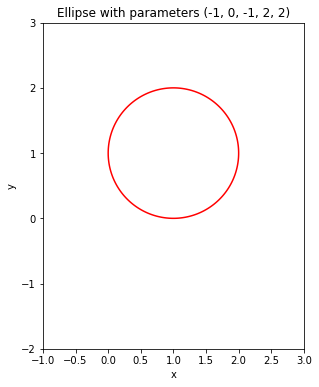

In [34]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse(-1, 0, -1, 2, 2)
plt.title('Ellipse with parameters (-1, 0, -1, 2, 2)')

[ 4.87314137 -7.89293482 -0.22651484]
e = [-0.45289988 -0.23676927 -0.35741872 -0.44536583  0.00824421 -0.02376494
  0.58169536]

||e|| = 0.9624339357020364

||e|| / N = 0.13749056224314807



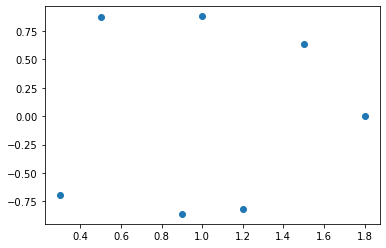

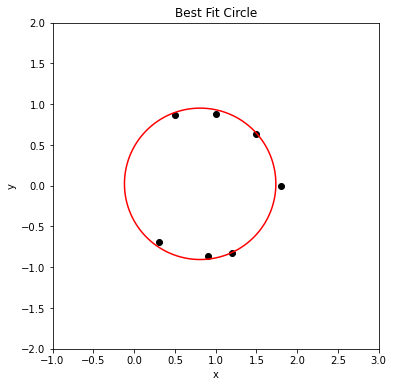

In [35]:
# PART C

xy = np.array([[0.3, -0.69],
               [0.5, 0.87],
               [0.9, -0.86],
               [1, 0.88],
               [1.2, -0.82],
               [1.5, .64],
               [1.8, 0]])
x = xy[:,0]
y = xy[:,1]

# plot the data points
plt.scatter(x,y)

# First we compute our estimated coefficients
A = np.array([x**2+y**2,x,y]).T 
b = np.ones((7,))
circle_params = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
print(circle_params)

# Then we plot
plt.figure(figsize=(6,6))
plot_circle(circle_params[0], circle_params[1], circle_params[2])
plt.scatter(x,y, color='k')

# Compute error
e = np.dot(A, circle_params) - b
print("e = {}\n".format(e))

e_magnitude = np.linalg.norm(e)

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))

[ 4.10382951  0.48711384  4.93938449 -6.85032284 -0.62259259]
e = [-0.00535492  0.00965504 -0.02961637 -0.04065528  0.04157513  0.05047406
 -0.03417349]

||e|| = 0.08997680361065102

||e|| / N = 0.01285382908723586



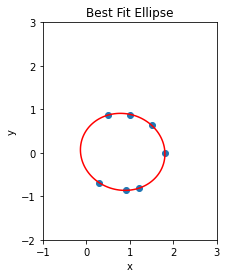

In [36]:
# Plot the data points
plt.scatter(x,y)

A = np.vstack((x**2, x*y, y**2, x, y)).T
b = np.ones((7,))

ellipse_params = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
print(ellipse_params)
plot_ellipse(ellipse_params[0],ellipse_params[1],ellipse_params[2],ellipse_params[3],ellipse_params[4])

# Compute error
e = np.dot(A, ellipse_params) - b
print("e = {}\n".format(e))

e_magnitude = np.linalg.norm(e)

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))